# Выпускной проект часть 3

**Название проекта**

Анализ БД сервиса для чтения книг
_____
**Описание исследования.**

Наша компания купила крупный сервис для чтения книг по подписке. Есть база данных, в котоой информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. 
_____
**Цель исследования.**

Проанализировать базу данных, чтобы в дальнейшем формулировать ценностное предложение для нового продукта.

_____
**Задачи исследования.**

* Посчитать, сколько книг вышло после 1 января 2000 года;
* Для каждой книги посчитайте количество обзоров и среднюю оценку;
* Определить издательство, которое выпустило наибольшее число книг толще 50 страниц
* Определить автора с самой высокой средней оценкой книг
* Посчитать среднее количество обзоров от пользователей, которые поставили больше 50 оценок.
_____
**Исходные данные.**
    
*Таблица  books*
Содержит данные о книгах:
* book_id  — идентификатор книги;
* author_id  — идентификатор автора;
* title  — название книги;
* num_pages  — количество страниц;
* publication_date  — дата публикации книги;
* publisher_id  — идентификатор издателя.

*Таблица  authors*
Содержит данные об авторах:
* author_id  — идентификатор автора;
* author  — имя автора.

*Таблица  publishers*
Содержит данные об издательствах:
* publisher_id  — идентификатор издательства;
* publisher  — название издательства;

Таблица  ratings
Содержит данные о пользовательских оценках книг:
* rating_id  — идентификатор оценки;
* book_id  — идентификатор книги;
* username  — имя пользователя, оставившего оценку;
* rating  — оценка книги.

Таблица  reviews
Содержит данные о пользовательских обзорах на книги:
* review_id  — идентификатор обзора;
* book_id  — идентификатор книги;
* username  — имя пользователя, написавшего обзор;
* text  — текст обзора.

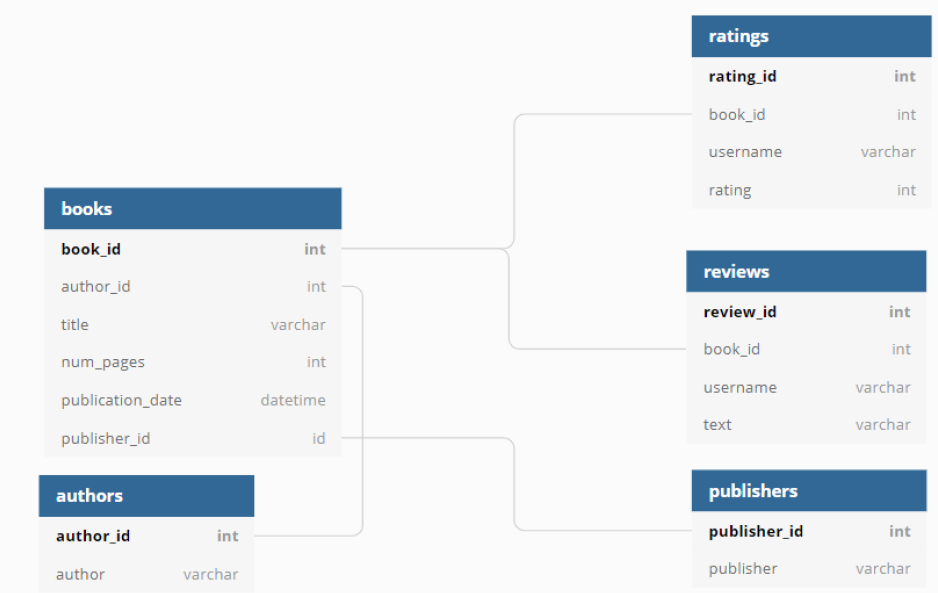
______

**Данное исследование разделим на несколько частей:**

* [Изучение общей информации](#main_info)
* [Решение задач исследования](#decision)
* [Вывод](#summary)

<a id='main_info'></a>
## Изучение общей информации

**На этом шаге**
* подключим библиотеки
* откроем и изучим файлы, необходимые для работы

In [1]:
# импортируем библиотеки 
import pandas as pd 
from sqlalchemy import create_engine

pd.set_option('display.max_colwidth', 0)

In [2]:
# устанавливаем параметры 
db_config = {'user': 'praktikum_student', # имя пользователя 
                     'pwd': 'Sdf4$2;d-d30pp', # пароль 
                     'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net', 
                     'port': 6432, # порт подключения 
                     'db': 'data-analyst-final-project-db'} # название базы данных 
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],\
                              db_config['pwd'], db_config['host'], db_config['port'], db_config['db'])

In [3]:
# сохраняем коннектор 
engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

In [4]:
# метот получения DataFrame по SQL запросу
def df_from_sql(query):
    return pd.io.sql.read_sql(query, con = engine)

books = df_from_sql("SELECT * FROM books") 
authors = df_from_sql("SELECT * FROM authors") 
ratings = df_from_sql("SELECT * FROM ratings") 
reviews = df_from_sql("SELECT * FROM reviews") 
publishers = df_from_sql("SELECT * FROM publishers") 

books.head()

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope #1),322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before Columbus,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [5]:
authors.head()

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [6]:
ratings.head()

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [7]:
reviews.head()

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. Over provide race technology continue these.
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Among admit investment argue security.
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but person sport treatment industry. Kitchen decision deep the. Social party body the.
3,4,3,johnsonamanda,Finally month interesting blue could nature cultural bit. Prepare beat finish grow that smile teach. Dream me play near.
4,5,3,scotttamara,Nation purpose heavy give wait song will. List dinner another whole positive radio fast. Music staff many green.


In [8]:
publishers.head()

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


***Вывод*** Библиотеки подключены, подключение настроено, таблицы получены и просмотрены

<a id='decision'></a>
## Решение задач исследования

**На этом шаге**
* Посчитаем, сколько книг вышло после 1 января 2000 года;
* Для каждой книги посчитаем количество обзоров и среднюю оценку;
* Определим издательство, которое выпустило наибольшее число книг толще 50 страниц — так мы исключим из анализа брошюры;
* Определим автора с самой высокой средней оценкой книг — учитываем только книги с 50 и более оценками;
* Посчитаем среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

Посчитаем, сколько книг вышло после 1 января 2000 года

In [9]:
print('Количество книг, вышедших после 1 января 2000 года:')
df_from_sql("SELECT COUNT(book_id) FROM books \
            WHERE publication_date > '2000-01-01'")['count'][0]


Количество книг, вышедших после 1 января 2000 года:


819

***Вывод:*** Количество книг, вышедших после 1 января 2000 года: 819

Для каждой книги посчитаем количество обзоров и среднюю оценку

In [10]:
df = df_from_sql("SELECT b.book_id, title, COUNT(DISTINCT r.review_id), AVG(rat.rating)\
            FROM books as b\
            LEFT JOIN reviews as r ON b.book_id = r.book_id \
            LEFT JOIN ratings as rat ON b.book_id = rat.book_id\
            GROUP BY b.book_id\
            ORDER BY count DESC")

display(df)
print('Суммарно обзоров:', df['count'].sum())

,book_id,title,count,avg
0,948,Twilight (Twilight #1),7,3.662500
1,963,Water for Elephants,6,3.977273
2,734,The Glass Castle,6,4.206897
3,302,Harry Potter and the Prisoner of Azkaban (Harry Potter #3),6,4.414634
4,695,The Curious Incident of the Dog in the Night-Time,6,4.081081
...,...,...,...,...
995,83,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.666667
996,808,The Natural Way to Draw,0,3.000000
997,672,The Cat in the Hat and Other Dr. Seuss Favorites,0,5.000000
998,221,Essential Tales and Poems,0,4.000000


Суммарно обзоров: 2793


***Выводы*** 
* Самые обозреваемые книги: "Twilight (Twilight #1)", "The Hobbit or There and Back Again", "The Catcher in the Rye". Причем у "Twilight (Twilight #1)" отрыв по обзорам более чем в 2 раза от занимающей 2е место.
* высокая обозреваемость книги вовсе не гарантирует высокую оценку, так у "Twilight (Twilight #1)" средняя оценка всего 3,7

Определим издательство, которое выпустило наибольшее число книг толще 50 страниц — так мы исключим из анализа брошюры

In [11]:
print('Издательство, которое выпустило наибольшее число книг толще 50 страниц')
df_from_sql("SELECT p.publisher, COUNT(b.book_id)\
            FROM publishers as p\
            LEFT JOIN books as b ON p.publisher_id = b.publisher_id \
            WHERE num_pages > 50\
            GROUP BY p.publisher\
            ORDER BY count DESC\
            LIMIT 1 ")

Издательство, которое выпустило наибольшее число книг толще 50 страниц


,publisher,count
0,Penguin Books,42


***Вывод*** Издательство, которое выпустило наибольшее число книг толще 50 страниц: Penguin Books (42 книги)

Определим автора с самой высокой средней оценкой книг — учитываем только книги с 50 и более оценками

In [12]:
print('Автор с самой высокой средней оценкой книг:')

df_from_sql("SELECT a.author, AVG(r.rating)\
            FROM authors as a\
            LEFT JOIN books as b ON b.author_id = a.author_id\
            LEFT JOIN ratings as r ON r.book_id = b.book_id \
            WHERE b.book_id IN (SELECT book_id\
                                FROM ratings\
                                GROUP BY book_id\
                                HAVING COUNT(book_id) > 50)\
            GROUP BY a.author_id\
            ORDER BY avg DESC\
            LIMIT 1")

Автор с самой высокой средней оценкой книг:


,author,avg
0,J.K. Rowling/Mary GrandPré,4.287097


***Вывод*** Автор с самой высокой средней оценкой книг: J.K. Rowling/Mary GrandPré - имеет среднюю оценку 4.3 

Посчитаем среднее количество обзоров от пользователей, которые поставили больше 50 оценок

In [13]:
df = df_from_sql("SELECT AVG(review_counts.count)\
                  FROM (SELECT username, COUNT(review_id)\
                        FROM reviews\
                        GROUP BY username\
                        HAVING username IN (SELECT username\
                                            FROM ratings\
                                            GROUP BY username\
                                            HAVING COUNT(rating_id) > 50)) \
                        AS review_counts")

print('Среднее количество обзоров от пользователей, которые поставили больше 50 оценок:',\
                                                                      "{:0.0f}".format(df['avg'][0]))

Среднее количество обзоров от пользователей, которые поставили больше 50 оценок: 24


***Вывод*** Среднее количество обзоров от пользователей, которые поставили больше 50 оценок: 24. Получается в среднем такие пользователи довольно активны и в обзорах.

**Вывод по шагу** 

Ответы на обозначенные задачи получены

<a id='summary'></a>
## Вывод

**Выпишем выводы, сделанные во время исследования:**
* Количество книг, вышедших после 1 января 2000 года: 819
* Самые обозреваемые книги: "Twilight (Twilight #1)", "The Hobbit or There and Back Again", "The Catcher in the Rye". Причем у "Twilight (Twilight #1)" отрыв по обзорам более чем в 2 раза от занимающей 2е место.
* высокая обозреваемость книги вовсе не гарантирует высокую оценку, так у "Twilight (Twilight #1)" средняя оценка всего 3,7
* Издательство, которое выпустило наибольшее число книг толще 50 страниц: Penguin Books (42 книги)
* Автор с самой высокой средней оценкой книг: J.K. Rowling/Mary GrandPré - имеет среднюю оценку 4.3 
* Среднее количество обзоров от пользователей, которые поставили больше 50 оценок: 24. Получается в среднем такие пользователи довольно активны и в обзорах.



**Общий вывод**

Данные проанализированы, теперь предстоит сформировать ценностное предложение
